# Lista Aula 4

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exercício 1: Cartão de Crédito

## Pré-processamento dos dados

### 1. Obtendo dados

In [2]:
# FONTE: https://www.kaggle.com/arjunbhasin2013/ccdata
dfCC = pd.read_csv('CC_DATASET.csv')

In [3]:
dfCC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 2. Tratamento dos outliers

In [4]:
# TEMOS ALGUNS VALORES EXTREMOS NO DF
dfCC['PURCHASES'].max()

1000000000.0

O bloco abaixo implementa um loop sobre todas as colunas do df e substitui os outliers superiores e inferiores pela média dos não ouliers, na fração de 0,1%.

In [5]:
for i in dfCC.drop(['CUST_ID'],axis=1):
    
    dfCC[i] = np.where(dfCC[i] <= dfCC[i].quantile(0.001),
                               
                                  dfCC[(dfCC[i] > dfCC[i].quantile(0.001)) & 
                                                (dfCC[i] < dfCC[i].quantile(0.999))][i].mean(),
                              
                                  dfCC[i])
    
    dfCC[i] = np.where(dfCC[i] >= dfCC[i].quantile(0.999),
                               
                                  dfCC[(dfCC[i] > dfCC[i].quantile(0.001)) & 
                                                (dfCC[i] < dfCC[i].quantile(0.999))][i].mean(),
                              
                                  dfCC[i])

In [6]:
# PÓS TRATAMENTO
dfCC['PURCHASES'].max()

27790.42

### 3. Tratamento de valores ausentes

In [7]:
dfCC.fillna(value = 0, inplace = True)
dfCC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.400000,1083.698336,95.400000,1974.557102,0.166667,0.319414,0.083333,0.273956,6.533272,2.000000,1000.0,201.802084,139.509787,0.346911,9.712983
1,C10002,3202.467416,0.909091,1258.407048,1083.698336,706.614394,6442.945483,0.467464,0.319414,0.521251,0.250000,4.000000,18.687545,7000.0,4103.032597,1072.340217,0.222222,9.712983
2,C10003,2495.148862,0.630180,773.170000,773.170000,706.614394,1974.557102,0.510131,0.354802,0.521251,0.273956,6.533272,12.000000,7500.0,622.066742,627.284787,0.346911,9.712983
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,706.614394,205.788017,0.083333,0.083333,0.521251,0.083333,1.000000,1.000000,7500.0,1741.734864,0.000000,0.346911,9.712983
4,C10005,817.714335,0.630180,16.000000,16.000000,706.614394,1974.557102,0.083333,0.083333,0.521251,0.273956,6.533272,1.000000,1200.0,678.334763,244.791237,0.346911,9.712983


### 4. Normalização

In [8]:
# INSTANCIANDO UM OBJETO ESTANDARIZADOR
from sklearn.preprocessing import StandardScaler
estandCC = StandardScaler()

In [9]:
# TREINANDO O ESTANDARIZADOR A PARTIR DOS DADOS DE CARTÕES
# A PRIMEIRA COLUNA (CUST_ID) NÃO FAZ PARTE DAS MÉTRICAS, VAMOS EXCLUÍ-LA DO FIT
estandCC.fit(dfCC.drop(['CUST_ID'],axis=1))

StandardScaler()

In [10]:
# A PARTIR DO OBJETO TREINADO, VAMOS TRANSFORMAR NOSSOS DADOS DE SEGURO AUTO EM DADOS NORMALIZADOS
valEstandCC = estandCC.transform(dfCC.drop(['CUST_ID'],axis=1))

In [11]:
# POR PADRÃO O RESULTADO PROCESSADO (TRANSFORMADO) POR StandardScaler É ENCAPSULADO EM UM OBJETO DO TIPO ARRAY (NUMPY)
# VAMOS CRIAR UM DF QUE A PARTIR DO ARRAY, INCLUINDO OS NOMES ORIGINAIS DAS COLUNAS
dfCCEstand = pd.DataFrame(valEstandCC, columns = dfCC.drop(['CUST_ID'],axis=1).columns)
dfCCEstand.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.753098,1.404516,-6.614830e-01,-8.920205e-07,-0.871131,-0.000001,-1.499869,-0.011206,-2.558003,-0.000672,-0.000120,-0.770635,-0.972045,-5.894687e-01,-0.372079,-0.005354,0.105134
1,0.810600,2.069397,-7.250268e-07,-8.920205e-07,-0.000001,2.731064,-0.050046,-0.011206,-0.014166,-0.177932,-0.496195,-0.000066,0.704750,9.038761e-01,0.163559,-0.881595,0.105134
2,0.460763,0.029525,-2.759885e-01,-2.522672e-01,-0.000001,-0.000001,0.155607,0.197310,-0.014166,-0.000672,-0.000120,-0.308872,0.844483,-4.285964e-01,-0.091995,-0.005354,0.105134
3,0.051001,0.074753,1.368411e-01,3.373810e-01,-0.000001,-1.081068,-1.901534,-1.402257,-0.014166,-1.411148,-1.083667,-0.816811,0.844483,-6.738633e-07,-0.452186,-0.005354,0.105134
4,-0.368889,0.029525,-7.066432e-01,-8.673753e-01,-0.000001,-0.000001,-1.901534,-1.402257,-0.014166,-0.000672,-0.000120,-0.816811,-0.916152,-4.070576e-01,-0.311626,-0.005354,0.105134


## Modelagem

### Clusterização sobre dados normalizados

In [12]:
# IMPORTANDO O K-MEANS DO SKLEARN
from sklearn.cluster import KMeans

In [13]:
# DEINIMOS EM K A QUANTIDADE DE GRUPOS QUE QUEREMOS "DIVIDIR OS DADOS"
k2 = 2

# INSTANCIANDO O OBJETO K-MEANS, COMO SERÃO DUAS CLUSTERIZAÇÕES, VAMOS DEFINIR K2 E K3
modeloKM_k2 = KMeans(n_clusters = k2)

# FITANDO O MODELO USANDO OS DADOS NORMALIZADOS (dfCCEstand)
modeloKM_k2.fit(X = dfCCEstand)

# ADICIONANDO AO DF OS CLUSTERS, A PARTIR DA PROPRIEDADE LABELS DO OBJETO KMEANS modeloKM_k2
dfCC['CLUSTER_K2'] = pd.DataFrame(modeloKM_k2.labels_).values

In [14]:
dfCC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_K2
0,C10001,40.900749,0.818182,95.400000,1083.698336,95.400000,1974.557102,0.166667,0.319414,0.083333,0.273956,6.533272,2.000000,1000.0,201.802084,139.509787,0.346911,9.712983,0
1,C10002,3202.467416,0.909091,1258.407048,1083.698336,706.614394,6442.945483,0.467464,0.319414,0.521251,0.250000,4.000000,18.687545,7000.0,4103.032597,1072.340217,0.222222,9.712983,1
2,C10003,2495.148862,0.630180,773.170000,773.170000,706.614394,1974.557102,0.510131,0.354802,0.521251,0.273956,6.533272,12.000000,7500.0,622.066742,627.284787,0.346911,9.712983,0
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,706.614394,205.788017,0.083333,0.083333,0.521251,0.083333,1.000000,1.000000,7500.0,1741.734864,0.000000,0.346911,9.712983,0
4,C10005,817.714335,0.630180,16.000000,16.000000,706.614394,1974.557102,0.083333,0.083333,0.521251,0.273956,6.533272,1.000000,1200.0,678.334763,244.791237,0.346911,9.712983,0


In [15]:
# VAMOS REPETIR OS MESMOS PASSOS PARA A CLUSTERIZAÇÃO DE TRÊS GRUPOS...
k3 = 3
modeloKM_k3 = KMeans(n_clusters = k3)
modeloKM_k3.fit(X = dfCCEstand)
dfCC['CLUSTER_K3'] = pd.DataFrame(modeloKM_k3.labels_).values

In [16]:
dfCC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_K2,CLUSTER_K3
0,C10001,40.900749,0.818182,95.400000,1083.698336,95.400000,1974.557102,0.166667,0.319414,0.083333,0.273956,6.533272,2.000000,1000.0,201.802084,139.509787,0.346911,9.712983,0,1
1,C10002,3202.467416,0.909091,1258.407048,1083.698336,706.614394,6442.945483,0.467464,0.319414,0.521251,0.250000,4.000000,18.687545,7000.0,4103.032597,1072.340217,0.222222,9.712983,1,0
2,C10003,2495.148862,0.630180,773.170000,773.170000,706.614394,1974.557102,0.510131,0.354802,0.521251,0.273956,6.533272,12.000000,7500.0,622.066742,627.284787,0.346911,9.712983,0,1
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,706.614394,205.788017,0.083333,0.083333,0.521251,0.083333,1.000000,1.000000,7500.0,1741.734864,0.000000,0.346911,9.712983,0,1
4,C10005,817.714335,0.630180,16.000000,16.000000,706.614394,1974.557102,0.083333,0.083333,0.521251,0.273956,6.533272,1.000000,1200.0,678.334763,244.791237,0.346911,9.712983,0,1


## Análise de dados

#### 1. Escolha duas métricas e plote um gráfico de dispersão, separando por cor os pontos da clusterização k=2.

<Figure size 1440x720 with 0 Axes>

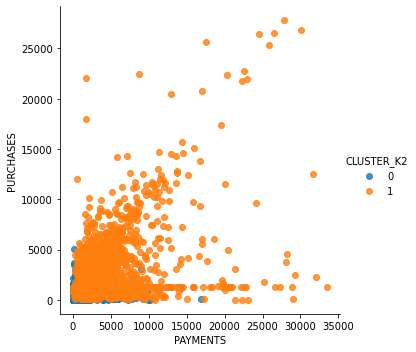

In [17]:
# PLOTANDO 
plt.figure(figsize=(20, 10))
sns.lmplot(x = 'PAYMENTS',y = 'PURCHASES', data = dfCC, hue = 'CLUSTER_K2', fit_reg=False)

#### 2. Repita o gráfico da questão anterior para k3. Visualmente qual a clusterização ficou melhor?

<Figure size 1080x576 with 0 Axes>

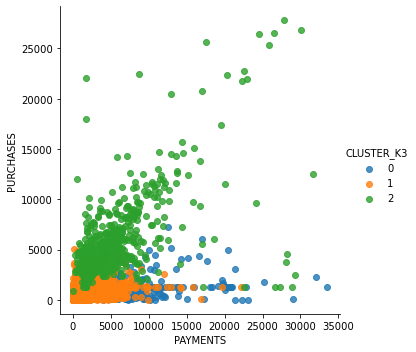

In [18]:
plt.figure(figsize=(15, 8))
sns.lmplot(x = 'PAYMENTS',y = 'PURCHASES', data = dfCC, hue = 'CLUSTER_K3', fit_reg=False)

A clusterização k=3 aparentemente separa melhor os casos

#### 3. Quantos casos ficaram enquadrados em cada cluster em cada uma das clusterizações?

In [19]:
print(dfCC.groupby('CLUSTER_K2')['CUST_ID'].count())
print('')
print(dfCC.groupby('CLUSTER_K3')['CUST_ID'].count())

CLUSTER_K2
0    7372
1    1578
Name: CUST_ID, dtype: int64

CLUSTER_K3
0     996
1    7327
2     627
Name: CUST_ID, dtype: int64


#### 4. Qual a média e a mediana de valor de compras, de cada cluster em cada uma das clusterizações?

In [20]:
print('MÉDIA')
print(dfCC.groupby('CLUSTER_K2')['PURCHASES'].mean())
print('MEDIANA')
print(dfCC.groupby('CLUSTER_K2')['PURCHASES'].median())
print('')
print('MÉDIA')
print(dfCC.groupby('CLUSTER_K3')['PURCHASES'].mean())
print('MEDIANA')
print(dfCC.groupby('CLUSTER_K3')['PURCHASES'].median())

MÉDIA
CLUSTER_K2
0     845.405079
1    3187.850601
Name: PURCHASES, dtype: float64
MEDIANA
CLUSTER_K2
0     744.355
1    2122.560
Name: PURCHASES, dtype: float64

MÉDIA
CLUSTER_K3
0    1106.338734
1     890.471247
2    5799.614482
Name: PURCHASES, dtype: float64
MEDIANA
CLUSTER_K3
0    1258.407048
1     789.960000
2    4689.030000
Name: PURCHASES, dtype: float64


#### 5. Usando a clusterização k=3, qual a mediana de limite de crédito de cada grupo?

In [21]:
dfCC.groupby('CLUSTER_K3')['CREDIT_LIMIT'].median()

CLUSTER_K3
0    7500.0
1    2850.0
2    7500.0
Name: CREDIT_LIMIT, dtype: float64

# Exercício 2: Diagnóstico de Câncer

## Pré-processamento

### 1. Obtendo os dados

In [22]:
dfDiag = pd.read_csv('DIAG_CANCER.csv')

In [23]:
dfDiag.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
# VARIÁVEL DE DESFECHO (ALVO DE UMA POSSÍVEL TAREFA DE CLASSIFICAÇÃO)
dfDiag['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [25]:
# VERIFICANDO OS TIPOS DAS VARIÁVEIS
dfDiag.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### 2.	Tratamento dos outliers

In [26]:
# APARENTEMENTE TEMOS 5 OUTLIERS
dfDiag.sort_values(by=['radius_mean'], ascending=False).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
316,894090,B,100003.00,14.08,77.25,461.4,0.07734,0.03212,0.011230,0.005051,...,16.47,81.60,513.1,0.1001,0.05332,0.04116,0.01852,0.2293,0.06037,NaN
315,894089,B,100002.00,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,...,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174,NaN
314,894047,B,100001.00,18.60,54.09,221.2,0.10740,0.05847,0.000000,0.000000,...,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116,NaN
313,893988,B,100000.00,10.72,73.73,409.1,0.08597,0.05969,0.013670,0.008907,...,12.87,81.23,467.8,0.1092,0.16260,0.08324,0.04715,0.3390,0.07434,NaN
212,8810703,M,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.320100,0.159500,...,18.47,188.50,2499.0,0.1142,0.15160,0.32010,0.15950,0.1648,0.05525,NaN


In [27]:
# TEMOS APROX. 500 REGISTROS NESSE DF (TOTAL), ENTÃO VAMOS SUBSTITUIR A EXTREMIDADE SUPERIOR EM 1%
# ISSO SERÁ O BASTANTE PARA RESOLVER OS 4 OUTLIERS OBSERVADOS ACIMA
# DIFERENTEMENTE DA MÉDIA, A MEDIANA É POUCO SENSÍVEL A OULIERS, ENTÃO NÃO VAMOS NOS PREOCUPAR EM RETIRAR OS OULIERS DO CÁLCULO DA MEDIANA
dfDiag['radius_mean'] = np.where(dfDiag['radius_mean'] >= dfDiag['radius_mean'].quantile(0.99), 
                                 dfDiag['radius_mean'].median(), 
                                 dfDiag['radius_mean'])
# VERIFICANDO COMO FICOU...
dfDiag.sort_values(by=['radius_mean'], ascending=False).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
180,873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,NaN
352,899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,NaN
82,8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,NaN
521,91762702,M,24.63,21.60,165.5,1841.0,0.1030,0.2106,0.2310,0.1471,...,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671,NaN
122,865423,M,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,NaN


### 3. Tratando os valores ausentes 

In [28]:
# EXCLUINDO Unnamed: 32    
dfDiag.drop(['Unnamed: 32'], axis = 1, inplace = True)

### 4. Nornalização

In [29]:
from sklearn.preprocessing import StandardScaler

# INSTANCIANDO UM OBJETO ESTANDARIZADOR
normDiagModel = StandardScaler()

# TREINANDO O ESTANDARIZADOR
normDiagModel.fit(dfDiag.drop(['id', 'diagnosis'],axis=1))

# APLICANDO O ESTANDARIZADOR SOBRE OS DADOS, GUARDANDO RESULTADO NO ARRAY normDiagData
normDiagData = normDiagModel.transform(dfDiag.drop(['id', 'diagnosis'],axis=1))

# CRIANDO UM DF COM OS DADOS NORMALIZADOS
dfNormDiag = pd.DataFrame(normDiagData, columns = dfDiag.drop(['id', 'diagnosis'],axis=1).columns)

# PRONTO, AGORA TEMOS O DF NORMALIZADO
dfNormDiag.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.140889,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.896129,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.638528,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.782337,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.814165,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 5. Redução de Dimensionalidade usando PCA

In [30]:
# IMPORTANDO A BIBLIOTECA
from sklearn.decomposition import PCA

# CRIANDO O OBJETO PCA COM 5 COMPONENTES
pca = PCA(n_components = 5)

# FITANDO UM MODELO PCA A PARTIR DOS DADOS NORMALIZADOS
pca.fit(normDiagData)

# APLICANDO OS DADOS AO MODELO GERADO
X_pca = pca.transform(normDiagData)

# RESULTADO PCA: TÍNHAMOS 30 AGORA TEMOS 5 VARIÁVEIS
pca.components_

array([[ 2.09186329e-01,  1.04040423e-01,  2.27390246e-01,
         2.20464796e-01,  1.43517068e-01,  2.40586752e-01,
         2.59165444e-01,  2.61483716e-01,  1.39329707e-01,
         6.57180979e-02,  2.04780732e-01,  1.75812786e-02,
         2.10117444e-01,  2.00989874e-01,  1.47294191e-02,
         1.71513469e-01,  1.54412228e-01,  1.84200969e-01,
         4.28019395e-02,  1.03559421e-01,  2.28023067e-01,
         1.05047995e-01,  2.36737792e-01,  2.24619030e-01,
         1.29160393e-01,  2.11573947e-01,  2.30020844e-01,
         2.51928994e-01,  1.24309968e-01,  1.33399937e-01],
       [-2.25440052e-01, -6.18568663e-02, -2.18322801e-01,
        -2.33268402e-01,  1.85503637e-01,  1.49453284e-01,
         5.80759214e-02, -3.77458758e-02,  1.89257107e-01,
         3.67544126e-01, -1.03486061e-01,  9.15798721e-02,
        -8.72083713e-02, -1.49228079e-01,  2.07514264e-01,
         2.32584289e-01,  1.97499537e-01,  1.29983737e-01,
         1.86184085e-01,  2.81364862e-01, -2.23613826e-

In [31]:
# CRIAMOS AQUI UM DF COM AS 5 NOVAS VARIÁVEIS (PÓS PCA)
dfDiagPCA = pd.DataFrame(data = X_pca, columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5'])

In [32]:
# INCLUINDO diagnosis NO DF REDUZIDO COM O PCA
dfDiagPCA['diagnosis'] = dfDiag['diagnosis']

In [33]:
# PRONTO! AGORA TEMOS UM DF REDUZIDO
# PODEMOS USAR ESSE DF PARA CRIAR UM MODELO DE CLASSIFICAÇÃO. EX.: REGRESSÃO LOGÍSTICA, ÁRVORE ALEATÓRIA, ETC.
dfDiagPCA.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,diagnosis
0,9.214061,1.887152,-1.098482,3.656224,-1.202350,M
1,2.375910,-3.797035,-0.520416,1.122150,0.637196,M
2,5.739777,-1.126269,-0.540528,0.921851,-0.166139,M
3,7.187313,10.212576,-3.294935,0.123993,-2.961263,M
4,3.927464,-1.961916,1.382075,2.944862,0.580039,M


## Modelagem

In [36]:
# IMPORTANDO AS BIBLIOTECAS...
# VAMOS UM CLASSIFICADOR BASEADO EM REGRESSÃO LOGÍSTICA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### 1. Modelo a partir dos dados originais

In [35]:
# DEFINE CONJUNTO DE VARIÁVEIS EXPLICATIVAS
X = dfDiag.drop(['diagnosis', 'id'], axis=1)

# DEFINE VARIÁVEL ALVO (DESFECHO)
Y = dfDiag['diagnosis']

# SPLIT TREINO/TESTE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# OBJETO CLASSIFICADOR
logmodel = LogisticRegression()

# TREINO E TESTE
logmodel.fit(X_train, Y_train)
predictions = logmodel.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print('ACURÁCIA')
print(classification_report(Y_test, predictions))
print('')
print('MATRIZ DE CONFUSÃO')
print(confusion_matrix(Y_test, predictions))

ACURÁCIA
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       105
           M       0.97      0.95      0.96        66

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


MATRIZ DE CONFUSÃO
[[103   2]
 [  3  63]]


### 2. Modelo a partir dos dados processados pelo PCA

In [38]:
# DEFINE CONJUNTO DE VARIÁVEIS EXPLICATIVAS
X_pca = dfDiagPCA.drop(['diagnosis'], axis=1)

# DEFINE VARIÁVEL ALVO (DESFECHO)
Y_pca = dfDiagPCA['diagnosis']

# SPLIT TREINO/TESTE
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y_pca, test_size=0.3)

# OBJETO CLASSIFICADOR
logmodelPCA = LogisticRegression()

# TREINO E TESTE
logmodelPCA.fit(X_train_pca, Y_train_pca)
predictionsPCA = logmodelPCA.predict(X_test_pca)

In [39]:
print('ACURÁCIA')
print(classification_report(Y_test_pca, predictionsPCA))
print('')
print('MATRIZ DE CONFUSÃO')
print(confusion_matrix(Y_test_pca, predictionsPCA))

ACURÁCIA
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


MATRIZ DE CONFUSÃO
[[106   2]
 [  3  60]]


### 3. Comparativo dos Modelos

Os resultados de matriz de confusão e acurácia ficaram muito próximos.
Isso nos conduz a inferir que o PCA pode ser uma boa ferramenta para lidar com problemas de grandes dimensionalidades de dados.

## Fechamento:
### Essa lista de exercícios nos ajudou a fixar técnicas de Normalização de Dados e Redução de Dimensionalidade.
### Adicionalmente, a partir dos dados pré-processados, aplicamos algoritmos de *machine learning*.